### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\USER\Desktop\Car Dataset.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
#Checking dataset dimensions Rows and Columns 
df.shape

(4340, 8)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
# Let's check data-type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
# Data cleaning
df.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#### Here we can see that there are no null values are available in my dataset.

In [9]:
# Let's Check Duplicate values
df.duplicated().sum()

763

#### As we can see that there are total 763 duplicate are available in dataset.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# Segregate Numerical and Categorical Columns
N_Column = df.columns[df.dtypes!='object']
Cat_Column = df.columns[df.dtypes=='object']
print("Numerical column",N_Column)
print("Categorical column",Cat_Column)

Numerical column Index(['year', 'selling_price', 'km_driven'], dtype='object')
Categorical column Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [12]:
df[Cat_Column].describe()

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


In [13]:
# Now Let's Check the total values count of each Categorical columns
df["name"].value_counts()

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

In [14]:
df["fuel"].value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [15]:
df["seller_type"].value_counts()

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

In [16]:
df["transmission"].value_counts()

Manual       3265
Automatic     312
Name: transmission, dtype: int64

In [17]:
df["owner"].value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

#### Data Visualization

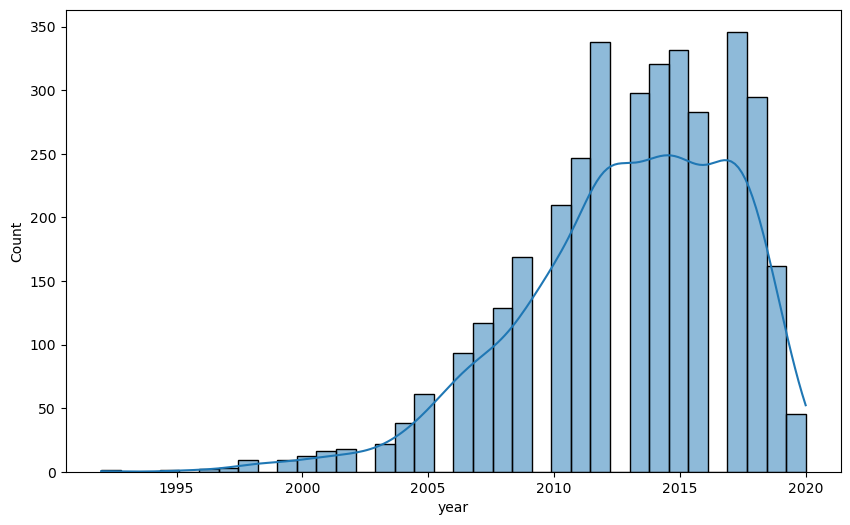

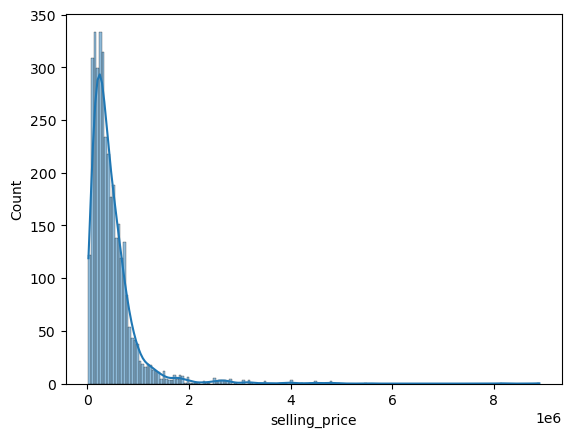

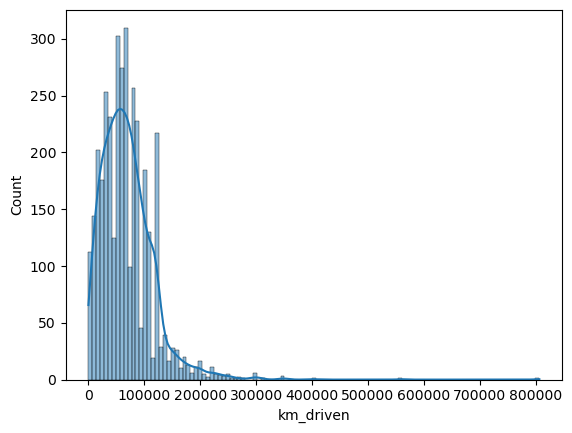

In [18]:
# Now we will apply histplot for each numerical column to check hist of numerical features.
plt.figure(figsize=(10,6))
x=0
for i in N_Column:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='selling_price', ylabel='year'>,
        <Axes: xlabel='km_driven', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='selling_price'>,
        <Axes: xlabel='selling_price', ylabel='selling_price'>,
        <Axes: xlabel='km_driven', ylabel='selling_price'>],
       [<Axes: xlabel='year', ylabel='km_driven'>,
        <Axes: xlabel='selling_price', ylabel='km_driven'>,
        <Axes: xlabel='km_driven', ylabel='km_driven'>]], dtype=object)

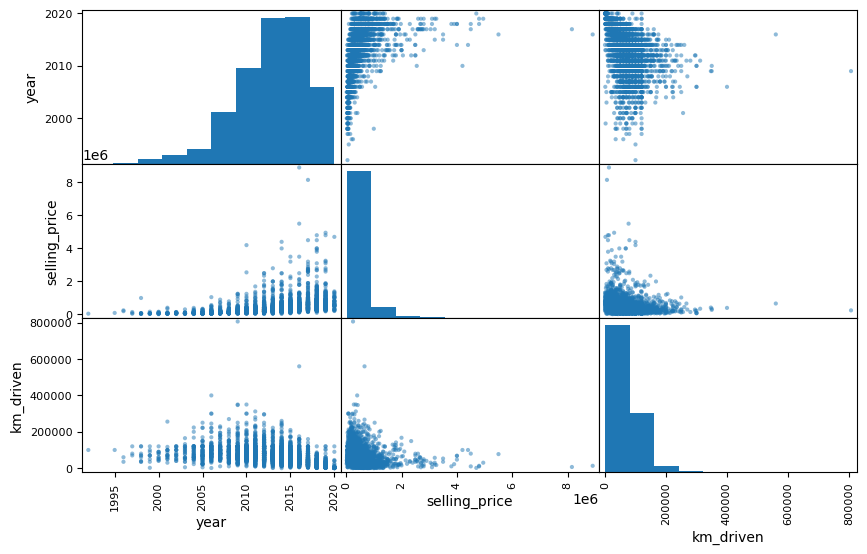

In [19]:
# Scatter plot matrix 
pd.plotting.scatter_matrix(df, figsize = (10, 6))

C:\Users\USER\AppData\Local\Temp\ipykernel_10160\3796730200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


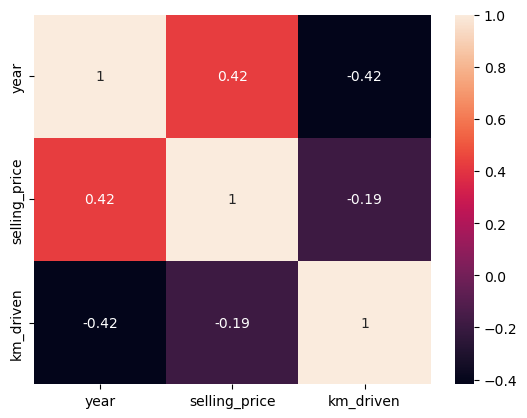

In [20]:
#Now we will check the correlation between numeric column.
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [22]:
print(df_encoded.head())

                       name  year  selling_price  km_driven  fuel_CNG  \
0             Maruti 800 AC  2007          60000      70000         0   
1  Maruti Wagon R LXI Minor  2007         135000      50000         0   
2      Hyundai Verna 1.6 SX  2012         600000     100000         0   
3    Datsun RediGO T Option  2017         250000      46000         0   
4     Honda Amaze VX i-DTEC  2014         450000     141000         0   

   fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Dealer  \
0            0              0         0            1                   0   
1            0              0         0            1                   0   
2            1              0         0            0                   0   
3            0              0         0            1                   0   
4            1              0         0            0                   0   

   seller_type_Individual  seller_type_Trustmark Dealer  \
0                       1                    

In [23]:
# Separate features and target variable
X = df_encoded.drop(columns=['selling_price','name'])
y = df_encoded['selling_price']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize numerical features if needed
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Data Modelling

In [26]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_trend=lr_model.fit(X_train, y_train)
lr_predict = lr_trend.predict(X_test)

In [27]:
lr_predict

array([ 4.88618559e+05,  4.78334281e+05,  6.28427341e+05,  1.56971365e+06,
        3.39098060e+04,  3.47305459e+05,  1.27300405e+05,  6.68712810e+05,
        7.83671403e+05,  2.97296924e+05,  4.81548546e+05,  3.94045863e+05,
        7.25892292e+05,  2.82410922e+05,  4.87791933e+05,  3.98483368e+05,
        4.01018022e+05,  7.77710391e+05,  4.55982643e+05,  3.31784974e+05,
        1.65973333e+05,  2.15849009e+05,  7.05352468e+03,  5.89852743e+05,
        5.50007856e+05,  4.62713219e+05,  5.14648214e+05,  6.43565305e+05,
        5.70809371e+05,  1.22799256e+05,  5.90731814e+05,  7.46337638e+04,
        9.33521939e+04,  1.23076739e+06,  2.63506805e+05,  6.51474649e+04,
        3.74190387e+05,  2.66280340e+05,  5.17233129e+05,  7.46693807e+05,
        1.31013516e+06,  4.52381901e+05,  7.39098472e+05,  6.98308642e+05,
        4.38747370e+05,  1.87517059e+05,  1.48268770e+05,  3.46524242e+05,
        1.02180496e+05,  4.34026925e+05,  3.58686222e+05,  5.90041363e+05,
        7.05090778e+05,  

In [28]:
compa = pd.DataFrame(y_test,lr_predict)
compa

,selling_price
4.886186e+05,NaN
4.783343e+05,NaN
6.284273e+05,NaN
1.569714e+06,NaN
3.390981e+04,NaN
...,...
1.690703e+05,NaN
5.946372e+05,NaN
2.838254e+05,NaN
3.768474e+05,NaN


In [29]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
# Train Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
# Evaluate models
models = {'Linear Regression': lr_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 195750605144.6967
Random Forest Mean Squared Error: 179855684989.4378
Gradient Boosting Mean Squared Error: 172385229508.9874


In [32]:

# Generate predictions using the random forest model
rf_predictions = rf_model.predict(X_test)

# Calculate R-squared score for Random Forest Regression
rf_r2 = r2_score(y_test, rf_predictions)
print(f"R-Squared Score for Random Forest Regression: {rf_r2: .2f}\n")

# Generate predictions using the gradient boosting model
gb_predictions = gb_model.predict(X_test)

# Calculate R-squared score for Gradient Boosting Regression
gb_r2 = r2_score(y_test, gb_predictions)
print(f"R-Squared Score for Gradient Boosting Regression: {gb_r2: .2f}\n")

# Generate predictions using the linear regression model
lr_predictions = lr_model.predict(X_test)

# Calculate R-squared score for Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)
print(f"R-Squared Score for Linear Regression: {lr_r2: .2f}")

R-Squared Score for Random Forest Regression:  0.44

R-Squared Score for Gradient Boosting Regression:  0.46

R-Squared Score for Linear Regression:  0.39


In [33]:
# Check correlation between variables
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                                  year  selling_price  km_driven  fuel_CNG  \
year                          1.000000       0.424260  -0.417490  0.008051   
selling_price                 0.424260       1.000000  -0.187359 -0.040303   
km_driven                    -0.417490      -0.187359   1.000000 -0.005801   
fuel_CNG                      0.008051      -0.040303  -0.005801  1.000000   
fuel_Diesel                   0.115800       0.276873   0.299145 -0.102894   
fuel_Electric                -0.027388      -0.005383  -0.002549 -0.001710   
fuel_LPG                     -0.051457      -0.046668   0.033680 -0.008042   
fuel_Petrol                  -0.108551      -0.261443  -0.303389 -0.098226   
seller_type_Dealer            0.140269       0.175024  -0.132437  0.011316   
seller_type_Individual       -0.153833      -0.187640   0.142546 -0.008804   
seller_type_Trustmark Dealer  0.067571       0.066012  -0.052344 -0.009865   
transmission_Automatic        0.116692       0.486269  -0.101387

C:\Users\USER\AppData\Local\Temp\ipykernel_10160\3107777632.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()
